Hand-In of Group 13, Jonathan Ehrengruber (jonathan.ehrengruber@students.fhnw.ch), Christian Renold (christian.renold@hslu.ch)

## MLP with TensorFlow 2.0
The objective of the exercise is to implement computational graphs in TensorFlow 2.0 to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

If you get this error in the execution of the first cell: ` ModuleNotFoundError: No module named 'tensorflow' `, it probably means TensorFlow 2.0 is not installed yet on your machine.

In [1]:
#############################
# MNIST Dataset Preparation #
#############################

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')
N = x_train.shape[0]         # number of samples
D = x_train.shape[1]         # dimension of input sample
n_classes = y_train.shape[1] # output dim
print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

MNIST data set ready. N=60000, D=784, n_classes=10


In [2]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0,len(data))  # create an array of index values
    np.random.shuffle(idx)        # shuffle it
    idx = idx[:num]               # take the first n indexes = size of batch
    data_shuffle = data[idx]      # extract the batch using the random indexes
    labels_shuffle = labels[idx]  # extract the labels using the random indexes

    return data_shuffle, labels_shuffle

In [6]:
##################
# Training phase #
##################

E = 50                # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_train(x, y, alpha):
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    h = tf.maximum((tf.matmul(x, w1) + b1), 0) # ...  output of first layer after ReLu activation
    y_pred = tf.math.sigmoid(tf.matmul(h, w2) + b2) # ... output of second layer after sigmoid activation
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    diff = y_pred - y
    loss = tf.reduce_mean(tf.pow(diff, 2))
    # define the gradients
    grad_w1, grad_b1, grad_w2, grad_b2 = tf.gradients(ys=loss, xs=[w1,b1,w2,b2])
    # compute the new values of the gradients with the assign method (see slides)
    w1.assign(w1 - alpha * grad_w1)
    b1.assign(b1 - alpha * grad_b1)
    w2.assign(w2 - alpha * grad_w2)
    b2.assign(b2 - alpha * grad_b2)
    return y_pred, loss

# Init the tf.Variablesw 1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.random.truncated_normal((D, H), stddev = 0.1, dtype='float64'))
b1 = tf.Variable(tf.constant(0.0, shape=[H], dtype='float64'))
w2 = tf.Variable(tf.random.truncated_normal((H, 10), stddev=0.1, dtype='float64'))
b2 = tf.Variable(tf.constant(0.0, shape=[10], dtype='float64'))

# Run the computational graph
J = [] # to store the evolution of loss J for each epoch
for epoch in range(E):
    J_epoch = 0.0
    for _ in range(int(N/B)): # number of batches to visit for 1 epoch
        # get batches calling the next_batch method provided above
        x_train_batch, y_train_batch = next_batch(B, x_train, y_train)
        with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
            # call the graph with the batched input, target and alpha A
            out = mlp_train(x_train_batch, y_train_batch, A)
        y_pred, loss_val = out
        J_epoch += loss_val
    J.append(J_epoch)
    print("epoch = {}, loss = {}".format(epoch, J_epoch))

epoch = 0, loss = 55.112330683769606
epoch = 1, loss = 40.61208278913693
epoch = 2, loss = 38.04094549309587
epoch = 3, loss = 35.92304072619245
epoch = 4, loss = 34.05342897353277
epoch = 5, loss = 32.352533155878305
epoch = 6, loss = 30.64224984196328
epoch = 7, loss = 28.990143370564176
epoch = 8, loss = 27.628595142106715
epoch = 9, loss = 26.133747353854858
epoch = 10, loss = 24.923412421788367
epoch = 11, loss = 23.73132004355527
epoch = 12, loss = 22.693661777390304
epoch = 13, loss = 21.937445318715973
epoch = 14, loss = 21.16186225260702
epoch = 15, loss = 20.490709905816832
epoch = 16, loss = 19.80714797196133
epoch = 17, loss = 19.233849025319397
epoch = 18, loss = 18.68681938724144
epoch = 19, loss = 18.42053532329558
epoch = 20, loss = 17.80337851882783
epoch = 21, loss = 17.46195980894744
epoch = 22, loss = 16.986625428485507
epoch = 23, loss = 16.738104827143253
epoch = 24, loss = 16.32409150587431
epoch = 25, loss = 16.214653810689953
epoch = 26, loss = 15.8883064521618

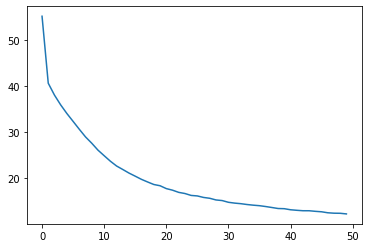

In [8]:
# Plot the evolution of the loss
plt.plot(J)

In [9]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_test(x, y):
    h = tf.maximum((tf.matmul(x, w1) + b1), 0)
    y_pred = tf.math.sigmoid(tf.matmul(h, w2) + b2)
    return y_pred

# Run the computational graph
with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
    y_pred_test = mlp_test(x_test, y_test)

print('Forward pass on test set done.')
# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

Forward pass on test set done.


In [10]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test
print('# samples  : ', N_test)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('accuracy   :  %2.2f %%'% (accuracy*100.0))
print('error rate :  %2.2f %%'% (error_rate*100.0))

# samples  :  10000
# correct  :  8838
# missed   :  1162
accuracy   :  88.38 %
error rate :  11.62 %


## Exercise 4 - Keras Implementation

* implement MPL from Ex3

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(D,), use_bias=True, activation='sigmoid'))
sgd = tf.keras.optimizers.SGD(learning_rate=A)

In [20]:
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
history1 = model.fit(x_train, y_train, epochs=E)
model.evaluate(x_test, y_test, verbose=2)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1012 - accuracy: 0.3559
Epoch 2/50
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0756 - accuracy: 0.5745
Epoch 3/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0662 - accuracy: 0.6388
Epoch 4/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0597 - accuracy: 0.6888
Epoch 5/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0550 - accuracy: 0.7344
Epoch 6/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0514 - accuracy: 0.7670
Epoch 7/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0485 - accuracy: 0.7900
Epoch 8/50
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0462 - accuracy: 0.8047s - loss: 0.046
Epoch 9/50
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0442 - accuracy: 0.8159

[0.025650525160133837, 0.8849]

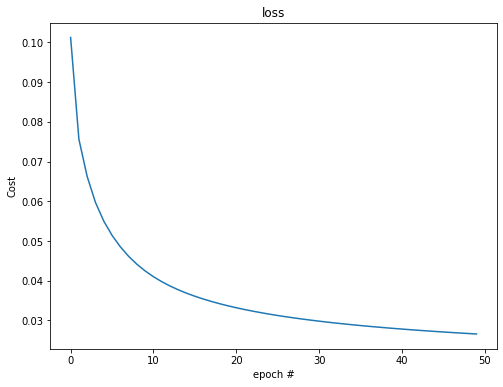

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = ax.plot(history1.history['loss'])
_ = ax.set_title('loss')
_ = ax.set_xlabel('epoch #')
_ = ax.set_ylabel('Cost')

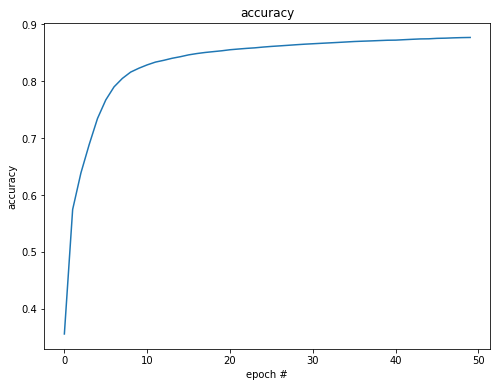

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = ax.plot(history1.history['accuracy'])
_ = ax.set_title('accuracy')
_ = ax.set_xlabel('epoch #')
_ = ax.set_ylabel('accuracy')

In [25]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(accuracy)

0.8849


we achieve the the same accuracy with the keras as with the low level tensorflow implementation